In [1]:
import pandas as pd

ames_housing = pd.read_csv("../datasets/ames_housing_no_missing.csv")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [12]:
scalar=StandardScaler()
X=scalar.fit_transform(data_numerical)
y=target

In [17]:
ridge=Ridge(alpha=1.00)
cv_results = cross_validate(ridge, X, y, cv=10)

In [16]:
cv_results

{'fit_time': array([0.01167512, 0.00525999, 0.00558925, 0.00377059, 0.00547004,
        0.00280046, 0.00447989, 0.003093  , 0.00235558, 0.00233769]),
 'score_time': array([0.00118208, 0.00054193, 0.00048256, 0.00098372, 0.00062299,
        0.00094199, 0.00096631, 0.00050664, 0.00057483, 0.0004859 ]),
 'test_score': array([0.7589206 , 0.80863869, 0.81191327, 0.66592199, 0.79817959,
        0.76868787, 0.67299013, 0.71368367, 0.37372302, 0.78369765])}

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), Ridge(alpha=1.00))
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1014.941352,493.591270,6145.027307,7862.001820,-658.039034,2228.213769,10673.168368,7710.687901,11239.374795,-2770.569902,...,2145.052452,11610.344076,-3183.723296,3287.994032,1493.838234,-3391.962390,32.95300,740.771764,-2419.756875,-1050.602603
max,2813.950135,2601.096893,7822.622938,11098.319437,358.820285,4175.634363,15693.414764,11243.005735,13642.435186,-1280.035931,...,3758.486675,22562.769198,4626.005696,5791.918839,3030.459490,-2102.823437,1697.85694,2172.624444,71.092558,607.322413


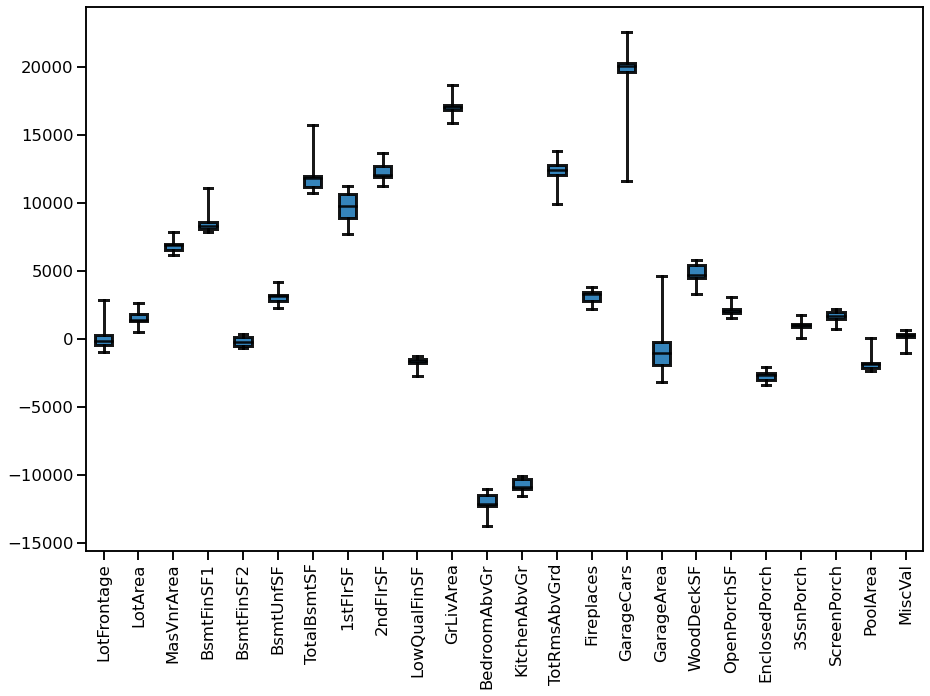

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

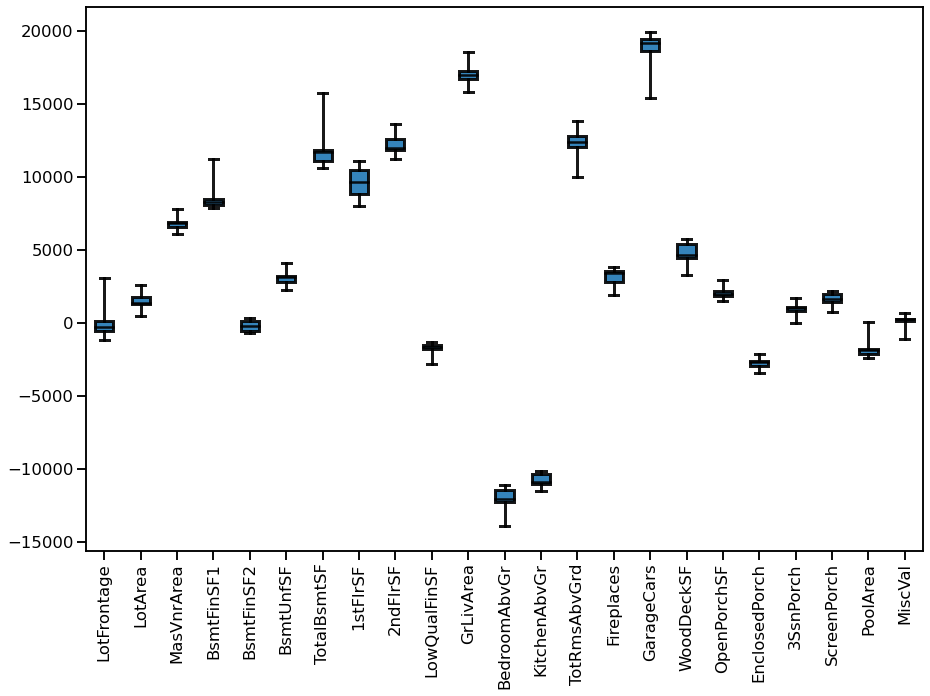

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

numerical_features_2 = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]
data_numerical_2 = data[numerical_features_2]

model = make_pipeline(StandardScaler(), Ridge(alpha=1.00))
cv_results = cross_validate(
    model, data_numerical_2, target, cv=10, return_estimator=True
)
coefs = [pipeline[-1].coef_ for pipeline in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features_2)
coefs.describe().loc[["min", "max"]]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [32]:
from sklearn.linear_model import RidgeCV
import numpy as np
X=data[numerical_features_2]
y=target
clf = RidgeCV(cv=10,alphas=np.logspace(-3, 3, num=101)).fit(X, y)
clf.score(X, y)

0.7410128762983681

In [34]:
clf.alpha_

0.7585775750291835

In [35]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
model2 = make_pipeline(StandardScaler(), LogisticRegression())
model3=DummyClassifier(strategy="most_frequent")

In [39]:
cv_results2 = cross_validate(
    model2, data, target, cv=10, return_estimator=True
)
cv_results2

{'fit_time': array([0.16947079, 0.12372613, 0.1171062 , 0.1074698 , 0.17397189,
        0.17423177, 0.14220405, 0.09582853, 0.08496046, 0.16676307]),
 'score_time': array([0.01118279, 0.01013446, 0.01158714, 0.01002836, 0.0131855 ,
        0.00838423, 0.0078547 , 0.00800681, 0.00782204, 0.01220322]),
 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  ('logisticregression', LogisticRegression())]),
  Pipeline(steps=[('standardscaler', StandardScaler()),
                  (

In [40]:
cv_results3 = cross_validate(
    model3, data, target, cv=10, return_estimator=True
)
cv_results3

{'fit_time': array([0.02273226, 0.02082467, 0.02156472, 0.02730775, 0.02174997,
        0.02219558, 0.0213027 , 0.02151442, 0.02160072, 0.02796912]),
 'score_time': array([0.0085752 , 0.00859284, 0.00820613, 0.00841308, 0.00890803,
        0.00800896, 0.0080719 , 0.0079875 , 0.00838947, 0.00947094]),
 'estimator': [DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent'),
  DummyClassifier(strategy='most_frequent')],
 'test_score': array([0.76069601, 0.76069601, 0.76085176, 0.76085176, 0.76085176,
        0.76064701, 0.76064701, 0.76064701, 0.76064701, 0.76064701])}

In [49]:
coefs = [pipeline[-1].coef_ for pipeline in cv_results2["estimator"]]

In [50]:
coefsn=[]
for coef in coefs:
    coefsn.append(coef[0])
coefsn

[array([0.52204276, 2.4667774 , 0.30602977, 0.53963505]),
 array([0.52606692, 2.40653282, 0.30817766, 0.54182433]),
 array([0.52425661, 2.45592287, 0.30812359, 0.54384342]),
 array([0.52037496, 2.45048201, 0.30916996, 0.53459728]),
 array([0.51925928, 2.51201042, 0.30424291, 0.54671495]),
 array([0.52173216, 2.4416315 , 0.30401707, 0.54128619]),
 array([0.52023528, 2.47372277, 0.30689298, 0.53637405]),
 array([0.52395804, 2.44532129, 0.30832579, 0.53825271]),
 array([0.51645436, 2.40508701, 0.30839363, 0.53512121]),
 array([0.51673694, 2.45048914, 0.30139428, 0.53553169])]

In [51]:
coefs = pd.DataFrame(coefsn, columns=data.columns.values.tolist())
coefs.describe().loc[["min", "max"]]

,age,capital-gain,capital-loss,hours-per-week
min,0.516454,2.405087,0.301394,0.534597
max,0.526067,2.512010,0.309170,0.546715


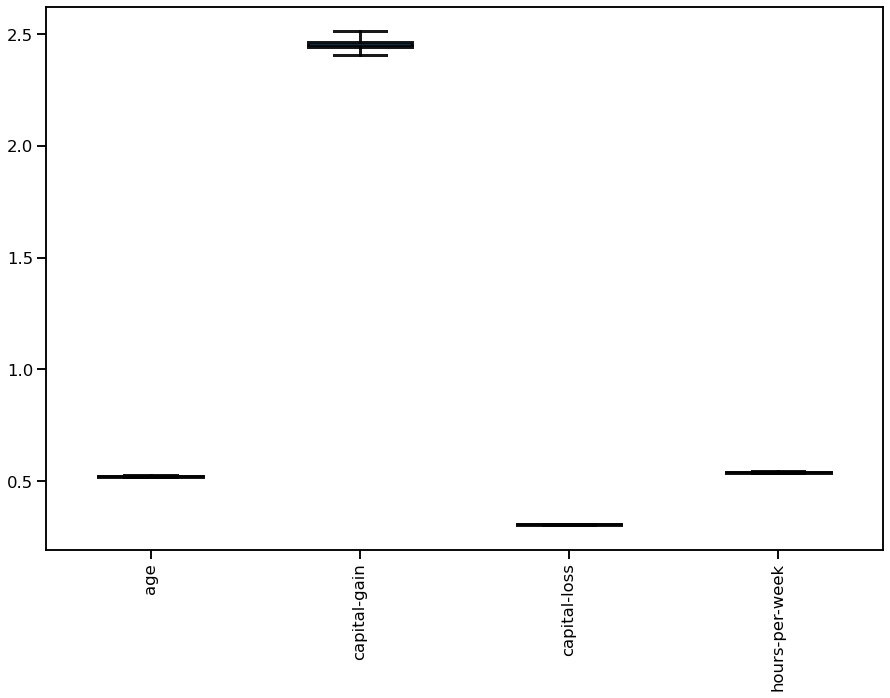

In [52]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)